In [57]:
# Packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
import datetime as D
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

## Récupération des données

In [58]:
#Récupération des données excel
path = r"C:/Users/arthu/OneDrive/Documents/@ESILV/A5/pi2/BNY/BNY-Markets-Regime-Project-127/DataProjet_V1.xlsx"
path
data = pd.read_excel(path)

#Réindexation
data.index=data['Date']
del data['Date']


#récupération du S&P 500
SnP = yf.download('^GSPC',"2000-01-01","2023-12-31")

#SnP
data

[*********************100%%**********************]  1 of 1 completed


,Bloomberg Barclays Global Aggregate Bond,Bloomberg Barclays Emerging Markets USD Aggregate,Bloomberg Commodity Index,Bloomberg Barclays Pan-European Aggregate Corporate Hedged to USD,Bloomberg Barclays Pan-European High Yield Hedged to USD,Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD,Bloomberg Barclays US Corporate,Bloomberg Barclays US Corporate High Yield,Bloomberg Barclays US Government Inflation-Linked 7 to 10 Years
Date,,,,,,,,,
2017-01-06,451.2591,1021.6870,176.6631,242.01,386.64,693.4913,2735.61,1831.42,295.395
2017-01-13,453.4327,1023.9043,179.0589,242.24,387.06,695.2612,2742.45,1835.04,296.871
2017-01-20,452.4924,1022.2497,178.7389,241.52,387.79,692.3600,2730.89,1833.88,296.281
2017-01-27,452.9716,1025.1906,177.9497,241.29,388.49,690.1031,2733.45,1841.42,296.893
2017-02-03,456.0482,1030.4708,177.8983,242.08,388.88,689.9425,2729.23,1847.56,296.384
...,...,...,...,...,...,...,...,...,...
2022-12-02,451.8751,1078.1550,248.6778,263.86,477.37,750.5967,3031.11,2220.00,349.746
2022-12-09,451.5544,1078.5880,242.9404,263.98,476.15,748.7644,3023.18,2215.70,342.335
2022-12-16,451.1433,1083.7040,245.2675,261.52,474.42,744.9739,3039.66,2216.33,341.426


## Risk Factor Lens

In [59]:
Lens=pd.DataFrame(index=data.index,columns=['Rates','Equity','Credit','Commodity'])

Lens['Rates']=data['Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD ']
Lens['Credit']=data['Bloomberg Barclays Pan-European Aggregate Corporate Hedged to USD']
Lens['Commodity']=data['Bloomberg Commodity Index']

for date in Lens.index:
    if date in SnP.index:
        Lens.loc[date,'Equity']=SnP.loc[date,'Adj Close']
        
# Nettoyage car SnP index n'a pas toute les dates demandées
Lens=Lens.dropna()

# Calcul des rendements
for col in Lens.columns:
    Lens[col]=Lens[col].pct_change()

# ajustement des rendements  
for col in Lens.columns:
    Lens[col]=Lens[col].values.reshape(-1,1)

# nettoyage
Lens=Lens.dropna()

Lens

,Rates,Equity,Credit,Commodity
Date,,,,
2017-01-13,0.002552,-0.001028,0.000950,0.013561
2017-01-20,-0.004173,-0.001464,-0.002972,-0.001787
2017-01-27,-0.003260,0.010294,-0.000952,-0.004415
2017-02-03,-0.000233,0.001190,0.003274,-0.000289
2017-02-10,0.002823,0.008131,0.004090,0.016189
...,...,...,...,...
2022-12-02,0.007727,0.011321,0.007330,-0.003078
2022-12-09,-0.002441,-0.033725,0.000455,-0.023072
2022-12-16,-0.005062,-0.020847,-0.009319,0.009579


In [60]:
# Chemin du fichier CSV
chemin_fichier_csv = 'C:/Users/arthu/OneDrive/Documents/@ESILV/A5/pi2/BNY/BNY-Markets-Regime-Project-127//Data_Lens_Macro_Return.csv'

Lens.to_csv(chemin_fichier_csv,index=True)


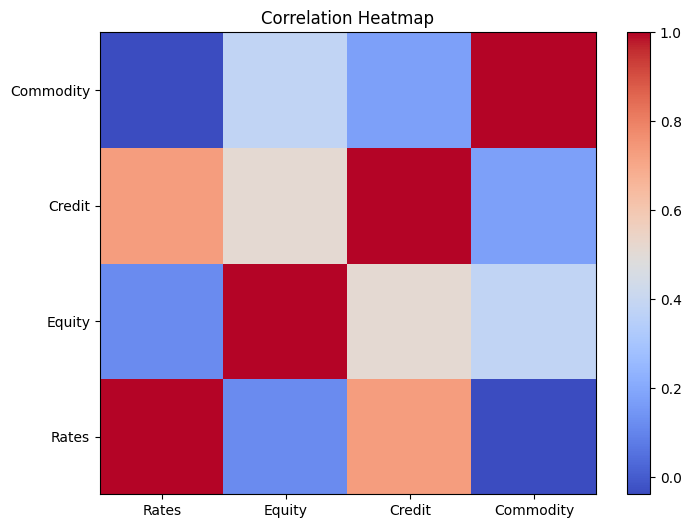

In [61]:
#corrélation
b=Lens.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(b, cmap='coolwarm')

# Add colorbar
plt.colorbar(heatmap)

# Set ticks at the middle of each cell
plt.xticks(np.arange(0.5, len(b.columns), 1), b.columns)
plt.yticks(np.arange(0.5, len(b.index), 1), b.columns)


plt.title('Correlation Heatmap')
plt.show()

In [62]:
b

,Rates,Equity,Credit,Commodity
Rates,1.000000,0.118621,0.730541,-0.037741
Equity,0.118621,1.000000,0.510468,0.382100
Credit,0.730541,0.510468,1.000000,0.176523
Commodity,-0.037741,0.382100,0.176523,1.000000


## ACP

Variance expliquée cumulée :
[0.69404423 0.95675739 0.99534101 1.        ]

Nombre de composantes principales pour 95.0% de variance expliquée : 2


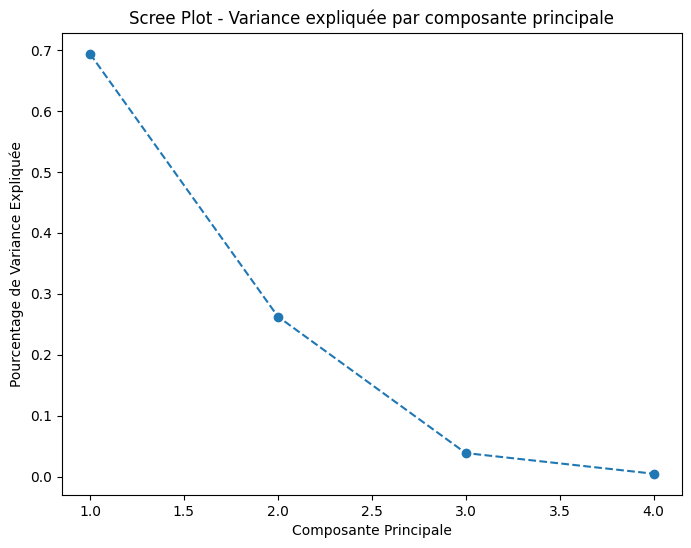


Résultats de l'ACP :
        PC1       PC2
0 -0.002967  0.012144
1  0.004992 -0.000736
2 -0.004402 -0.008570
3  0.001239 -0.001197
4 -0.012585  0.010106


In [63]:
# Instanciation de l'objet PCA
pca = PCA()

# Appliquer PCA sur les données standardisées
pca_result = pca.fit_transform(Lens)

# Proportion de variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage du pourcentage de variance expliquée cumulatif
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Variance expliquée cumulée :")
print(cumulative_explained_variance)

# Nombre de composantes principales à retenir en fonction du pourcentage de variance expliquée
threshold_variance = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1
print(f"\nNombre de composantes principales pour {threshold_variance * 100}% de variance expliquée : {num_components}")

# Affichage du scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot - Variance expliquée par composante principale')
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.show()

# Projection des données dans l'espace des composantes principales
df_pca = pd.DataFrame(pca_result[:, :num_components], columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Affichage des résultats
print("\nRésultats de l'ACP :")
print(df_pca.head())

plt.show()

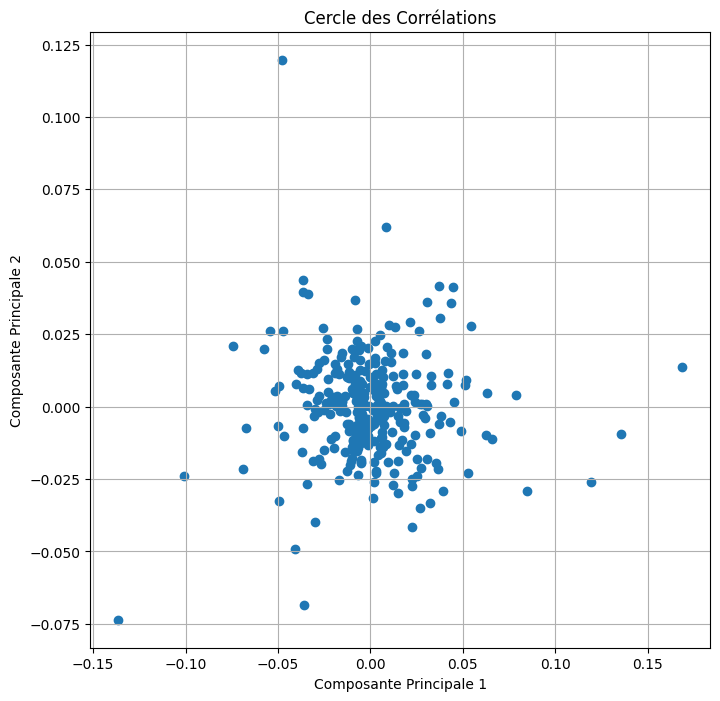

In [64]:
# Affichage du cercle des corrélations
plt.figure(figsize=(8, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Cercle des Corrélations')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

#for i, variable in enumerate(Lens.columns):
#    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
#    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, variable, color='g')

plt.grid(True)
plt.show()

## Exponentially-weighted regression

In [65]:
Lens_adj=Lens.copy(deep=True)
Lens_adj

,Rates,Equity,Credit,Commodity
Date,,,,
2017-01-13,0.002552,-0.001028,0.000950,0.013561
2017-01-20,-0.004173,-0.001464,-0.002972,-0.001787
2017-01-27,-0.003260,0.010294,-0.000952,-0.004415
2017-02-03,-0.000233,0.001190,0.003274,-0.000289
2017-02-10,0.002823,0.008131,0.004090,0.016189
...,...,...,...,...
2022-12-02,0.007727,0.011321,0.007330,-0.003078
2022-12-09,-0.002441,-0.033725,0.000455,-0.023072
2022-12-16,-0.005062,-0.020847,-0.009319,0.009579


In [66]:
# Define the rolling window size
rolling_window = 51  # Assuming weekly returns with approximately 252 trading days in a year

# Exponentially weighted residualization process using pd.ewm() and pd.DataFrame.rolling()
def ewm_residualize(donnees, dependent_column, independent_columns, span):
    result = pd.DataFrame(index=donnees.index)
    
    for col in independent_columns:
        # Calculate EWMA of the independent variable
        ewma_x = donnees[col].ewm(span=span).mean()

        # Calculate EWMA of the dependent variable
        ewma_y = donnees[dependent_column].ewm(span=span).mean()

        # Calculate residuals using rolling regression
        residuals = donnees[dependent_column] - ewma_y
        for i in range(rolling_window, len(donnees)):
            window_data = donnees[i - rolling_window:i + 1]
            window_ewma_x = ewma_x[i - rolling_window:i + 1]

            # Rolling regression to calculate residuals
            X = np.column_stack((np.ones_like(window_ewma_x), window_ewma_x))
            beta = np.linalg.lstsq(X, window_data[dependent_column], rcond=None)[0]
            residuals.iloc[i] = window_data[dependent_column].iloc[-1] - np.dot(X[-1, :], beta)

        result[col + '_residual'] = residuals
    
    return result

In [67]:
#Test sur la colonne Credit

# Apply exponentially weighted residualization to Credit returns with Interest Rates and Equity
span_parameter = 20  # Adjust span parameter based on preferences
residualized_data = ewm_residualize(Lens_adj, 'Credit', ['Rates', 'Equity'], span_parameter)

# Display the results
print(residualized_data)

            Rates_residual  Equity_residual
Date                                       
2017-01-13        0.000000         0.000000
2017-01-20       -0.001863        -0.001863
2017-01-27        0.000099         0.000099
2017-02-03        0.003077         0.003077
2017-02-10        0.002951         0.002951
...                    ...              ...
2022-12-02        0.000877         0.005281
2022-12-09       -0.005108         0.000651
2022-12-16       -0.012564        -0.007435
2022-12-23       -0.008183        -0.006743
2022-12-30       -0.001551        -0.001520

[302 rows x 2 columns]


In [68]:
span_parameter = 20  # Adjust span parameter based on preferences
#residualized_data = ewm_residualize(Returns, 'Credit', ['Rates', 'Equity'], span_parameter)
for i in range(2,len(Lens_adj.columns)):
    residualized_data = ewm_residualize(Lens_adj, Lens_adj.columns[i], ['Rates', 'Equity'], span_parameter)
    for d in Lens_adj.index:
        for j in residualized_data.columns:
            Lens_adj['Credit'].loc[d]=Lens_adj['Credit'].loc[d]-residualized_data[j].loc[d]

Lens_adj

,Rates,Equity,Credit,Commodity
Date,,,,
2017-01-13,0.002552,-0.001028,0.000950,0.013561
2017-01-20,-0.004173,-0.001464,0.015335,-0.001787
2017-01-27,-0.003260,0.010294,0.011403,-0.004415
2017-02-03,-0.000233,0.001190,0.000179,-0.000289
2017-02-10,0.002823,0.008131,-0.024477,0.016189
...,...,...,...,...
2022-12-02,0.007727,0.011321,0.030747,-0.003078
2022-12-09,-0.002441,-0.033725,0.067973,-0.023072
2022-12-16,-0.005062,-0.020847,0.008012,0.009579


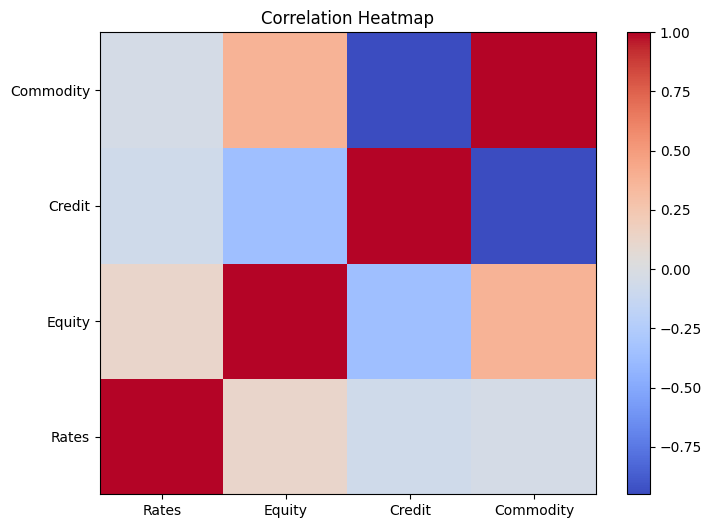

In [69]:
#corrélation
c=Lens_adj.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(c, cmap='coolwarm')

# Add colorbar
plt.colorbar(heatmap)

# Set ticks at the middle of each cell
plt.xticks(np.arange(0.5, len(c.columns), 1), c.columns)
plt.yticks(np.arange(0.5, len(c.index), 1), c.columns)


plt.title('Correlation Heatmap')
plt.show()

In [70]:
b

,Rates,Equity,Credit,Commodity
Rates,1.000000,0.118621,0.730541,-0.037741
Equity,0.118621,1.000000,0.510468,0.382100
Credit,0.730541,0.510468,1.000000,0.176523
Commodity,-0.037741,0.382100,0.176523,1.000000


In [71]:
c

,Rates,Equity,Credit,Commodity
Rates,1.000000,0.118621,-0.066874,-0.037741
Equity,0.118621,1.000000,-0.363376,0.382100
Credit,-0.066874,-0.363376,1.000000,-0.950404
Commodity,-0.037741,0.382100,-0.950404,1.000000


## GMM

In [72]:
# Création des dataset pour s'entrainer et tester
df_train = Lens_adj[Lens_adj.index<pd.to_datetime('2019-01-01')]
df_test = Lens_adj[Lens_adj.index>pd.to_datetime('2019-01-01')]

num_states = 4  # Définissez le nombre d'états de marché
model = GaussianMixture(n_components=num_states)

# Ajustez le modèle
model.fit(df_train)

# 4. Identification des états de marché
market_states = model.predict(df_test)
Proba_market_states=model.predict_proba(df_test)

# Ajoutez les états de marché en tant que colonne dans les données
res=np.column_stack((df_test, market_states,Proba_market_states))
res=pd.DataFrame(res,index=df_test.index,columns=['Rates','Equity','Credit','Commodity','Market_State','0','1','2','3'])
res

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2019-01-04,0.002882,0.018586,-0.036202,0.010058,1.0,4.795460e-07,9.816963e-01,1.830323e-02,4.401338e-19
2019-01-11,-0.000478,0.025403,-0.044998,0.017411,1.0,3.320419e-10,9.998255e-01,1.744984e-04,4.939343e-24
2019-01-18,-0.000002,0.028676,-0.049990,0.022042,1.0,6.407950e-12,9.999938e-01,6.184350e-06,6.042939e-24
2019-01-25,0.003968,-0.002228,-0.000774,-0.003338,2.0,2.720189e-03,9.304307e-02,9.042367e-01,8.515601e-08
2019-02-01,0.002727,0.015675,-0.004078,-0.000820,2.0,3.584537e-03,6.384009e-02,9.325754e-01,5.618281e-14
...,...,...,...,...,...,...,...,...,...
2022-12-02,0.007727,0.011321,0.030747,-0.003078,2.0,3.640720e-04,1.049958e-06,9.961214e-01,3.513432e-03
2022-12-09,-0.002441,-0.033725,0.067973,-0.023072,3.0,1.432984e-32,3.492858e-14,3.121547e-07,9.999997e-01
2022-12-16,-0.005062,-0.020847,0.008012,0.009579,2.0,6.427596e-47,8.663921e-06,5.787664e-01,4.212249e-01


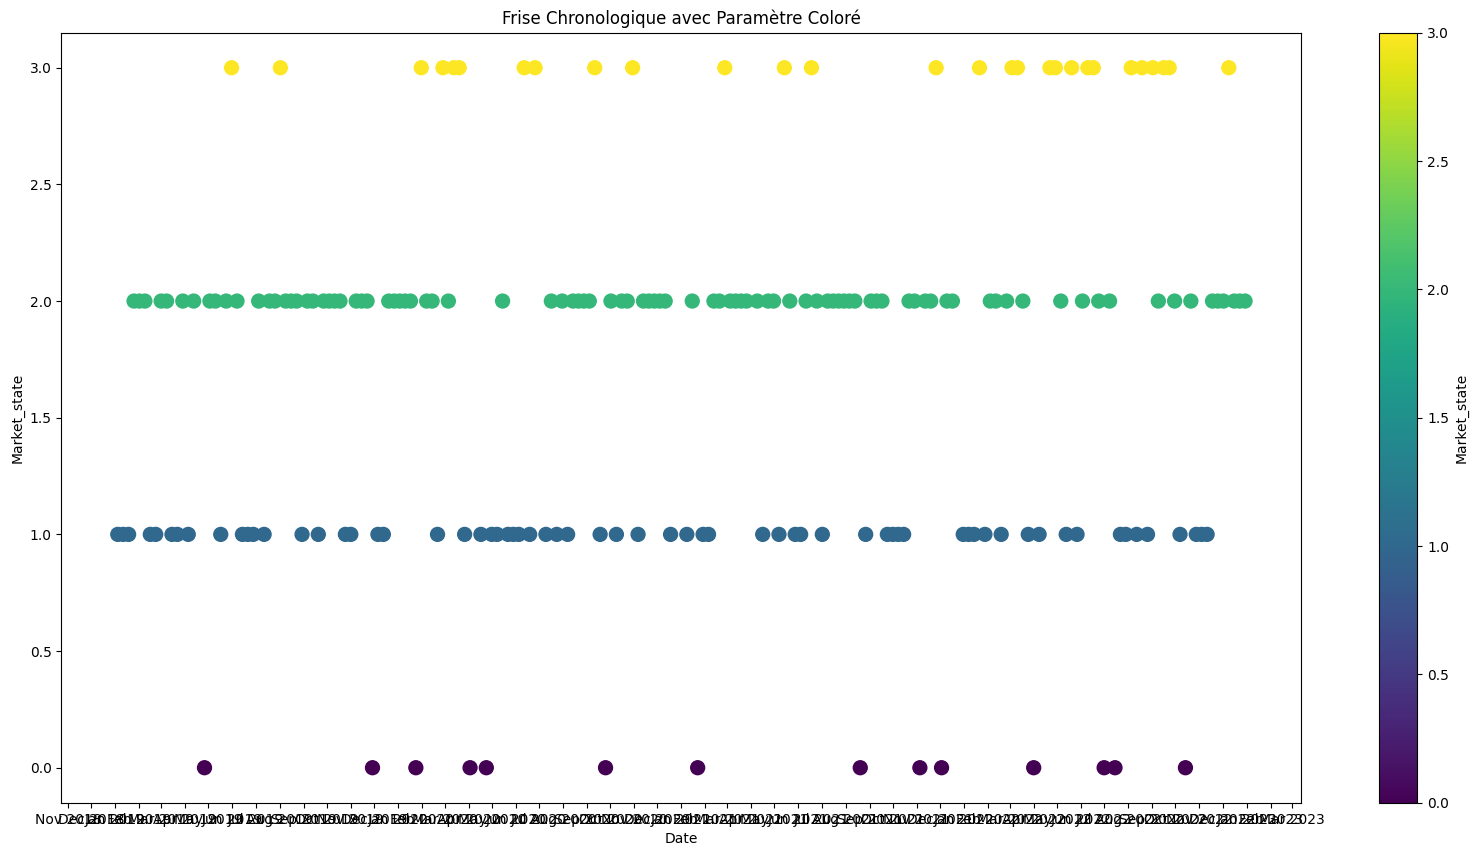

In [87]:
# Normalisation du paramètre pour l'utilisation des couleurs
norm = Normalize(vmin=res['Market_State'].min(), vmax=res['Market_State'].max())
colors = [plt.cm.viridis(norm(value)) for value in res['Market_State']]

# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(20, 10))

# Tracer la frise chronologique
scatter = ax.scatter(res.index, res['Market_State'], c=colors, marker='o', s=100)

# Ajouter une barre de couleur
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=ax)
cbar.set_label('Market_state')

# Formattage des dates sur l'axe x
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Ajouter des titres et des labels
ax.set_title('Frise Chronologique avec Paramètre Coloré')
ax.set_xlabel('Date')
ax.set_ylabel('Market_state')

# Afficher la frise chronologique
plt.show()


In [88]:
res

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2019-01-04,0.002882,0.018586,-0.036202,0.010058,1.0,4.795460e-07,9.816963e-01,1.830323e-02,4.401338e-19
2019-01-11,-0.000478,0.025403,-0.044998,0.017411,1.0,3.320419e-10,9.998255e-01,1.744984e-04,4.939343e-24
2019-01-18,-0.000002,0.028676,-0.049990,0.022042,1.0,6.407950e-12,9.999938e-01,6.184350e-06,6.042939e-24
2019-01-25,0.003968,-0.002228,-0.000774,-0.003338,2.0,2.720189e-03,9.304307e-02,9.042367e-01,8.515601e-08
2019-02-01,0.002727,0.015675,-0.004078,-0.000820,2.0,3.584537e-03,6.384009e-02,9.325754e-01,5.618281e-14
...,...,...,...,...,...,...,...,...,...
2022-12-02,0.007727,0.011321,0.030747,-0.003078,2.0,3.640720e-04,1.049958e-06,9.961214e-01,3.513432e-03
2022-12-09,-0.002441,-0.033725,0.067973,-0.023072,3.0,1.432984e-32,3.492858e-14,3.121547e-07,9.999997e-01
2022-12-16,-0.005062,-0.020847,0.008012,0.009579,2.0,6.427596e-47,8.663921e-06,5.787664e-01,4.212249e-01



 ------------------------------------------- 

État de marché 0 - Nombre d'observations : 14
           Rates     Equity     Credit  Commodity
count  14.000000  14.000000  14.000000  14.000000
mean    0.003262  -0.003892   0.048456  -0.027197
std     0.004851   0.013975   0.033485   0.012220
min    -0.005063  -0.022090  -0.039041  -0.045877
25%     0.000428  -0.012925   0.041349  -0.033434
50%     0.002131  -0.007809   0.047627  -0.029395
75%     0.006411   0.007554   0.063008  -0.020346
max     0.012302   0.020009   0.101816  -0.006007

 ------------------------------------------- 

État de marché 1 - Nombre d'observations : 65
           Rates     Equity     Credit  Commodity
count  65.000000  65.000000  65.000000  65.000000
mean    0.000645   0.017725  -0.038715   0.021127
std     0.005992   0.031052   0.027477   0.014369
min    -0.013309  -0.040398  -0.120437  -0.015409
25%    -0.002550  -0.002126  -0.043411   0.012726
50%     0.001096   0.015071  -0.032370   0.018266
75%     0.00

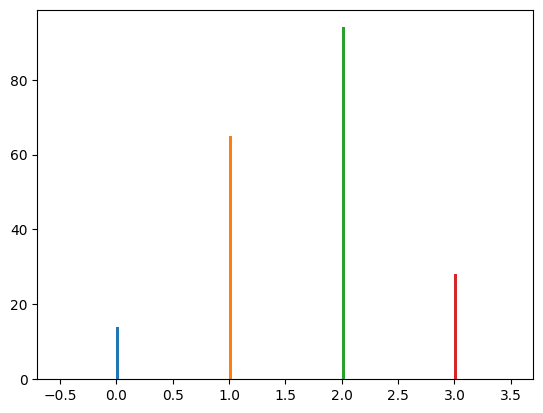

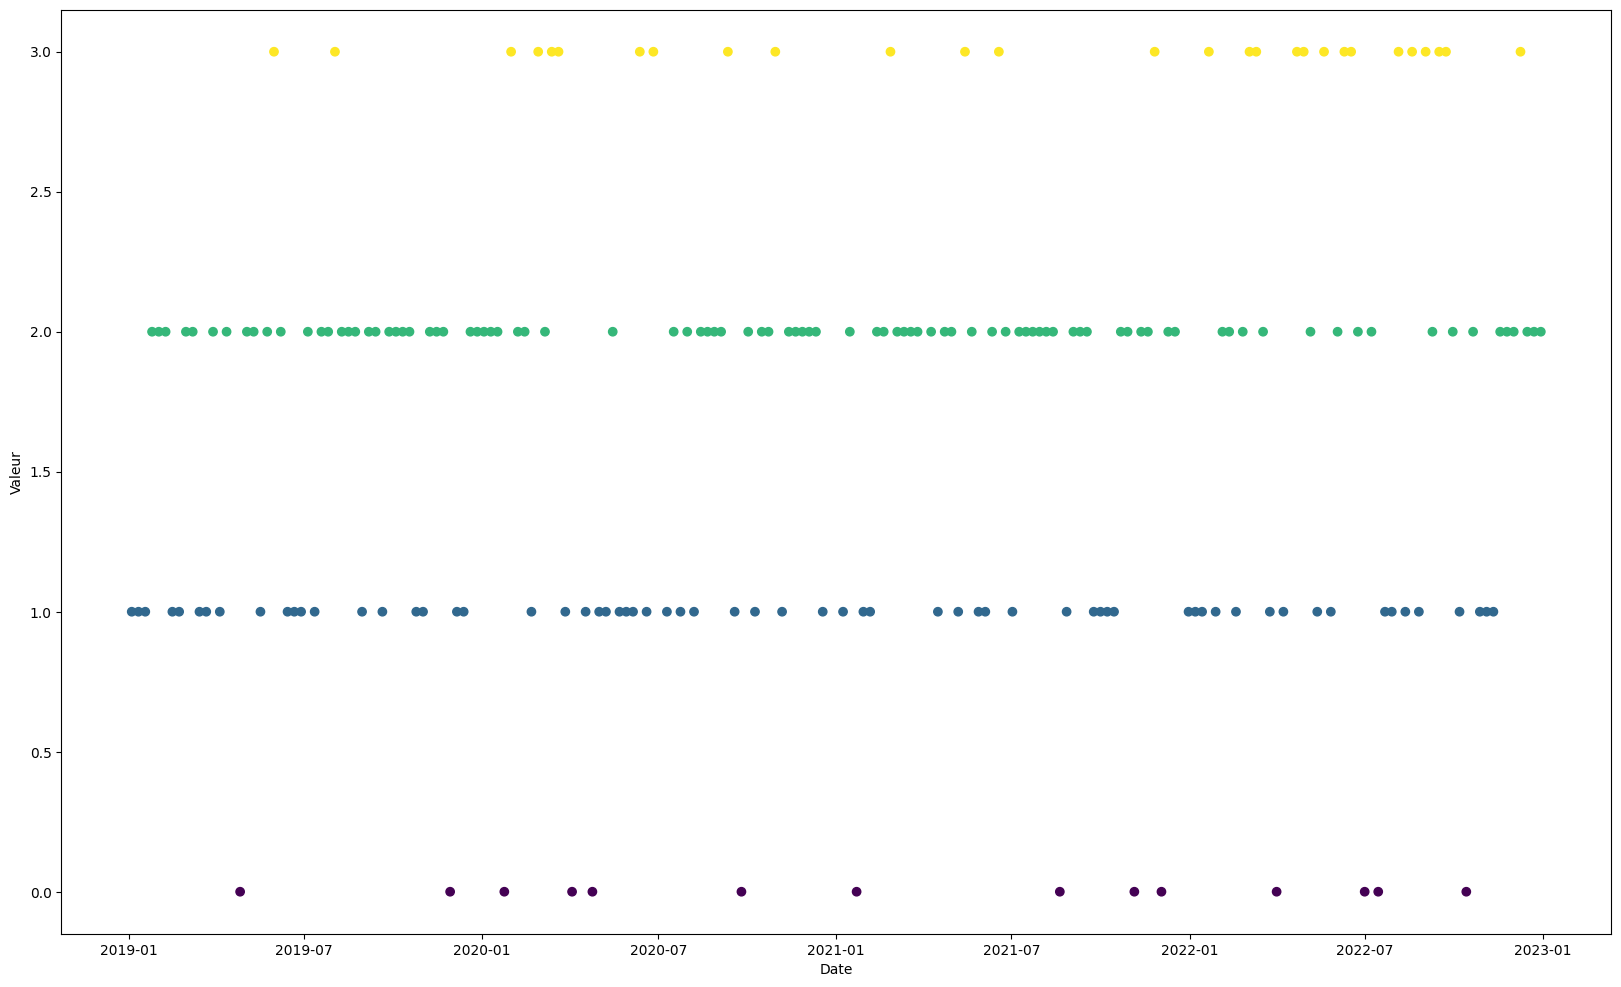

In [89]:
# Affichez les statistiques des différents états de marché
for state in range(num_states):
    state_data = res[res['Market_State'] == state]
    print("\n ------------------------------------------- \n")
    print(f"État de marché {state} - Nombre d'observations : {len(state_data)}")
    print(state_data.iloc[:,:4].describe()) #voir si on garde la colonne Adj Close 
    plt.hist(state_data['Market_State'], bins=40, density=False)

plt.figure(1)
plt.figure(figsize=(20, 12)) 
plt.scatter(res.index,res['Market_State'], c=res['Market_State'])
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

In [90]:
#Résultats en pourcentage
res_pct=res.copy(deep=True)

for col in res_pct.columns:
    res_pct[col]=res_pct[col]*100

res_pct

,Rates,Equity,Credit,Commodity,Market_State,0,1,2,3
Date,,,,,,,,,
2019-01-04,0.288249,1.858600,-3.620152,1.005805,100.0,4.795460e-05,9.816963e+01,1.830323,4.401338e-17
2019-01-11,-0.047820,2.540347,-4.499839,1.741052,100.0,3.320419e-08,9.998255e+01,0.017450,4.939343e-22
2019-01-18,-0.000230,2.867585,-4.999019,2.204157,100.0,6.407950e-10,9.999938e+01,0.000618,6.042939e-22
2019-01-25,0.396802,-0.222785,-0.077369,-0.333833,200.0,2.720189e-01,9.304307e+00,90.423665,8.515601e-06
2019-02-01,0.272690,1.567496,-0.407847,-0.082037,200.0,3.584537e-01,6.384009e+00,93.257538,5.618281e-12
...,...,...,...,...,...,...,...,...,...
2022-12-02,0.772715,1.132103,3.074659,-0.307763,200.0,3.640720e-02,1.049958e-04,99.612145,3.513432e-01
2022-12-09,-0.244112,-3.372549,6.797315,-2.307162,300.0,1.432984e-30,3.492858e-12,0.000031,9.999997e+01
2022-12-16,-0.506234,-2.084694,0.801156,0.957889,200.0,6.427596e-45,8.663921e-04,57.876641,4.212249e+01



 ------------------------------------------- 

État de marché 0 - Nombre d'observations : 14
           Rates     Equity     Credit  Commodity
count  14.000000  14.000000  14.000000  14.000000
mean    0.326242  -0.389169   4.845584  -2.719714
std     0.485082   1.397507   3.348502   1.221977
min    -0.506325  -2.208989  -3.904113  -4.587738
25%     0.042819  -1.292499   4.134898  -3.343390
50%     0.213103  -0.780899   4.762650  -2.939539
75%     0.641133   0.755449   6.300782  -2.034589
max     1.230235   2.000919  10.181644  -0.600696

 ------------------------------------------- 

État de marché 1 - Nombre d'observations : 65
           Rates     Equity     Credit  Commodity
count  65.000000  65.000000  65.000000  65.000000
mean    0.064467   1.772537  -3.871464   2.112712
std     0.599237   3.105168   2.747657   1.436891
min    -1.330905  -4.039751 -12.043654  -1.540916
25%    -0.254988  -0.212569  -4.341120   1.272555
50%     0.109629   1.507125  -3.237032   1.826630
75%     0.30

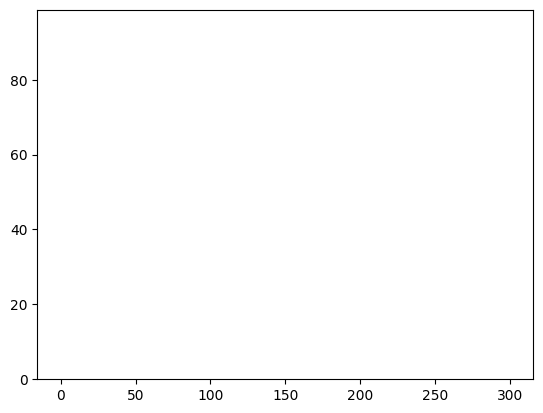

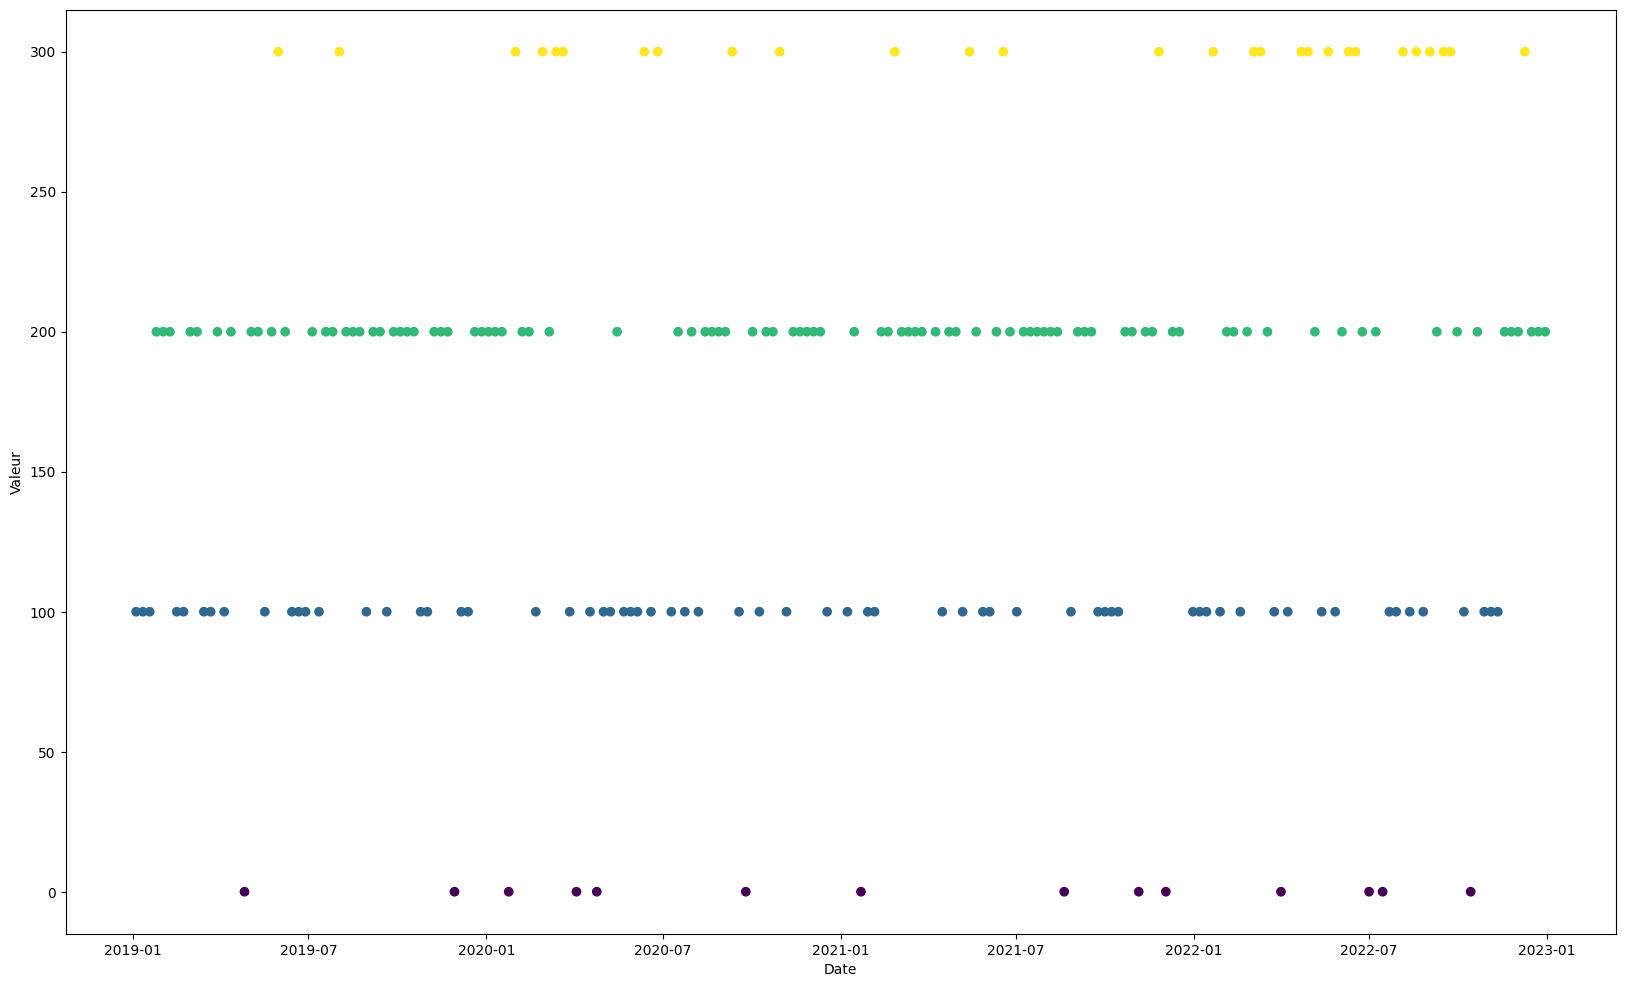

In [77]:
# Affichez les statistiques des différents états de marché
for state in range(num_states):
    state_data = res_pct[res_pct['Market_State'] == state*100]
    print("\n ------------------------------------------- \n")
    print(f"État de marché {state} - Nombre d'observations : {len(state_data)}")
    print(state_data.iloc[:,:4].describe()) #voir si on garde la colonne Adj Close 
    plt.hist(state_data['Market_State'], bins=40, density=False)

plt.figure(1)
plt.figure(figsize=(20, 12)) 
plt.scatter(res_pct.index,res_pct['Market_State'], c=res_pct['Market_State'])
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

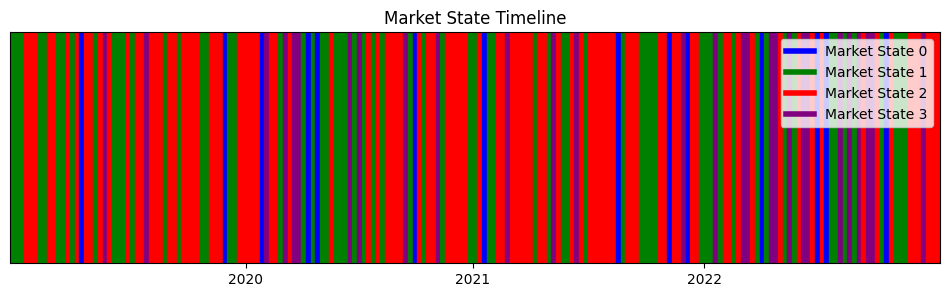

In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# Supposons que res est votre DataFrame déjà chargé
# Couleurs pour chaque régime de marché
colors = {'0': 'blue', '1': 'green', '2': 'red', '3': 'purple'}

# Création d'une figure pour la frise
fig, ax = plt.subplots(figsize=(12, 3))

# Hauteur du rectangle pour la frise
rectangle_height = 1

# Tracé des rectangles pour chaque date
for i, date in enumerate(res.index):
    # Déterminer la couleur en fonction du régime de marché
    market_state = str(int(res.at[date, 'Market_State']))  # Conversion en chaîne après conversion en entier
    color = colors[market_state]
    
    # Création du rectangle
    rect = patches.Rectangle((i, 0), 1, rectangle_height, color=color)
    ax.add_patch(rect)

# Configuration de l'axe des x pour afficher uniquement les années
years = [date.year for date in res.index]
change_years = [i for i in range(1, len(years)) if years[i] != years[i-1]]
ax.set_xticks(change_years)
ax.set_xticklabels([years[i] for i in change_years])

# Configuration des limites de l'axe
ax.set_xlim(0, len(res))
ax.set_ylim(0, rectangle_height)
ax.set_yticks([])  # Pas de marques sur l'axe des y

# Création d'une légende pour les états de marché
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Market State {state}') for state, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper right')

# Titre et affichage du graphique
ax.set_title('Market State Timeline')
plt.show()



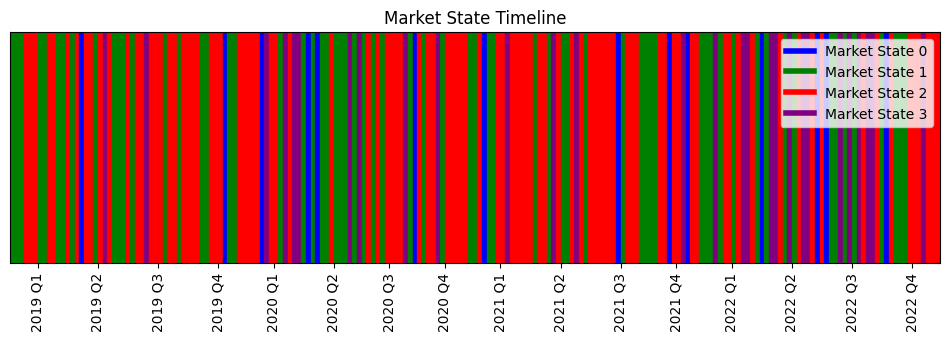

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import numpy as np

# Supposons que res est votre DataFrame déjà chargé
# Couleurs pour chaque régime de marché
colors = {'0': 'blue', '1': 'green', '2': 'red', '3': 'purple'}

# Création d'une figure pour la frise
fig, ax = plt.subplots(figsize=(12, 3))

# Hauteur du rectangle pour la frise
rectangle_height = 1

# Tracé des rectangles pour chaque date
for i, date in enumerate(res.index):
    # Déterminer la couleur en fonction du régime de marché
    market_state = str(int(res.at[date, 'Market_State']))  # Conversion en chaîne après conversion en entier
    color = colors[market_state]
    
    # Création du rectangle
    rect = patches.Rectangle((i, 0), 1, rectangle_height, color=color)
    ax.add_patch(rect)

# Configuration de l'axe des x pour afficher les graduations au quart et à la moitié de chaque année
years = [date.year for date in res.index]
unique_years = sorted(set(years))
year_indices = {year: [i for i, y in enumerate(years) if y == year] for year in unique_years}

# Ajout des graduations pour chaque quart et moitié d'année
tick_positions = []
tick_labels = []
for year, indices in year_indices.items():
    if len(indices) >= 4:  # Assurez-vous qu'il y a assez de données pour l'année
        quarter = np.array_split(indices, 4)
        for q in range(4):
            tick_pos = quarter[q][len(quarter[q]) // 2]  # Position au milieu du quart
            tick_positions.append(tick_pos)
            tick_labels.append(f"{year} Q{q+1}")
    else:
        # Si pas assez de données, utilisez juste la position médiane de l'année
        tick_positions.append(indices[len(indices) // 2])
        tick_labels.append(str(year))

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=90)

# Configuration des limites de l'axe
ax.set_xlim(0, len(res))
ax.set_ylim(0, rectangle_height)
ax.set_yticks([])  # Pas de marques sur l'axe des y

# Création d'une légende pour les états de marché
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Market State {state}') for state, color in colors.items()]
ax.legend(handles=legend_elements, loc='upper right')

# Titre et affichage du graphique
ax.set_title('Market State Timeline')
plt.show()
